<a href="https://colab.research.google.com/github/EssenceBL/MakingFriends/blob/main/From_Spirographs_to_a_Programmable_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preface**

As is well-known, computers have greatly advanced the field of education and teaching methodologies; and there are various level of sophistication in its usage. Firstly, high-quality typesetting documents with TeX and LaTeX have enabled an elegant display of mathematical equations. Secondly, computer graphics have provided static images to support learning. Thirdly, animations and videos, such as those found on the YouTube channel 3blue1brown, have been used to enhance the learning experience. Next, interactive software like GeoGebra and JSXGraph have enabled users to simulate various phenomena. Finally, as we grow in our maturity, we could use programmable environments to take greater control and make a fuller use of the computer. To begin with, let's play with Google Colab!

-- YK Tai co-writing with Sage in 2023

Like other programmable environment, let's begin with the very first line of printing "Hello World!" to get a sense of it. You may do so by going to the cell code and click the run button, or use keyboard to type Shift+Enter:


In [16]:
print("Hello World!")

Hello World!



Recall from somewhere else, such as in geogebra, you might have learnt how to interpret a [spirograph](https://en.wikipedia.org/wiki/Spirograph) as a parametric equation that describe the trajectory of a given point with distance $a$ from the center of a circle of radius $r$, that rolls along with another circle of radius $R$. Indeed, there are various natural ways of parametrization. Here we recall two:
One is to parametrize with reference to the rolling angle of the line connecting the centers of the two circles with as $\theta$;
\begin{align}
x_\theta &= (R-r)\cos \theta+a\cos (\frac{R-r}{r}\theta) \\
y_\theta &= (R-r)\sin \theta-a\sin(\frac{R-r}{r}\theta)
\end{align}
An obvious alternative is to parametrize with reference to the rolling angle of the line connecting the center of the rolling circle and the point of trajectory as $\theta' = \frac{R-r}{r}\theta$.

A more abstract parametrization can be obtained by substitutions $k = R-r$, $N = \frac{R-r}{r}$. In such a way, it would be convenient to represent the trajectory with complex number $x_\theta+iy_\theta = k e^{i \theta} + a e^{- i N \theta}$.

In default settings, we should be using the first parametrization and some common packages to compute and plot some spirographs. The audience may attempt to amend to other parametrization if they feel efficacious to do so.

Please run the following code cell to define spirpgraph.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

#find the gcd of two integers
def gcdEuclid(a, b):
  if a == 0:
    return b
  return gcdEuclid(b % a, a)

#define the spirograph
def spirograph(R, r, a, boundary, step=360):
  R = int(R)
  r = int(r)
  #compute number of cycles to complete the spirograph
  n = abs(int(r/gcdEuclid(R,r)))
  s = np.array(range(n*step+1))
  plt.rcParams["figure.figsize"] = (8,8)
  plt.xlim(-boundary,boundary)
  plt.ylim(-boundary,boundary)
  thetas = 2*np.pi*s/step
  xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
  ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
  plt.plot(xs, ys)


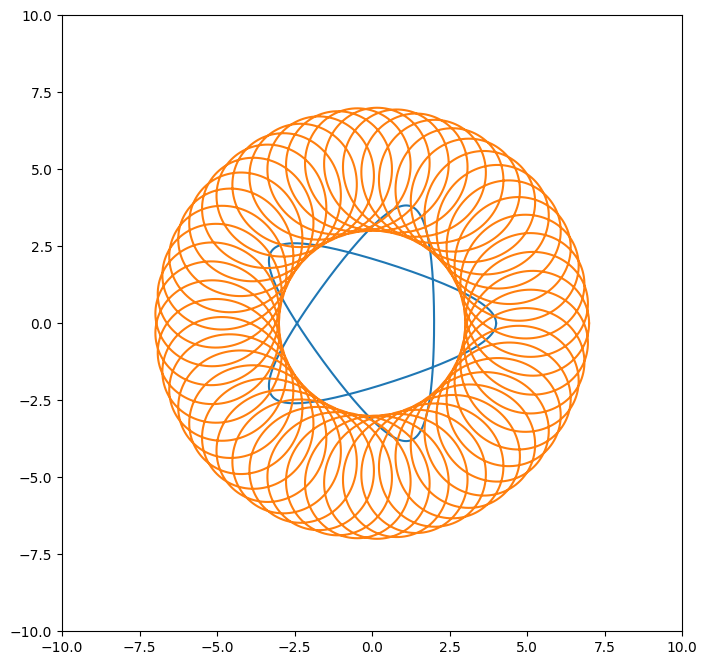

In [70]:
spirograph(R=5, r=2, a=1, boundary=6, step=360)

spirograph(R=53, r=51, a=5, boundary=10, step=360)


When $r=a$, we have the special case of a [hypocycloid](https://en.wikipedia.org/wiki/Hypocycloid):

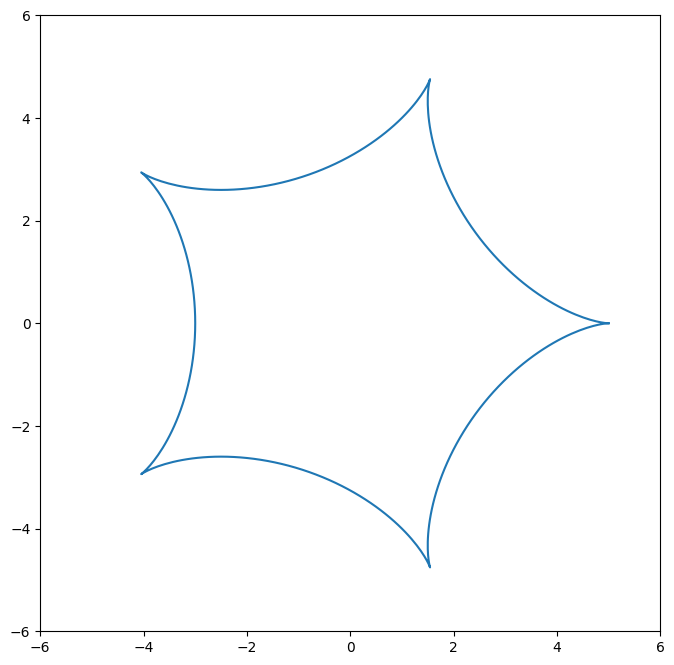

In [71]:
spirograph(R=5, r=1, a=1, boundary=6, step=360)
#uncomment the next line to play with an alternative
#spirograph(R=5, r=2, a=2, boundary=6, step=360)

When the sign of $r$ is defined oppositely, we would have an [Epitrochoid](https://en.wikipedia.org/wiki/Epitrochoid):

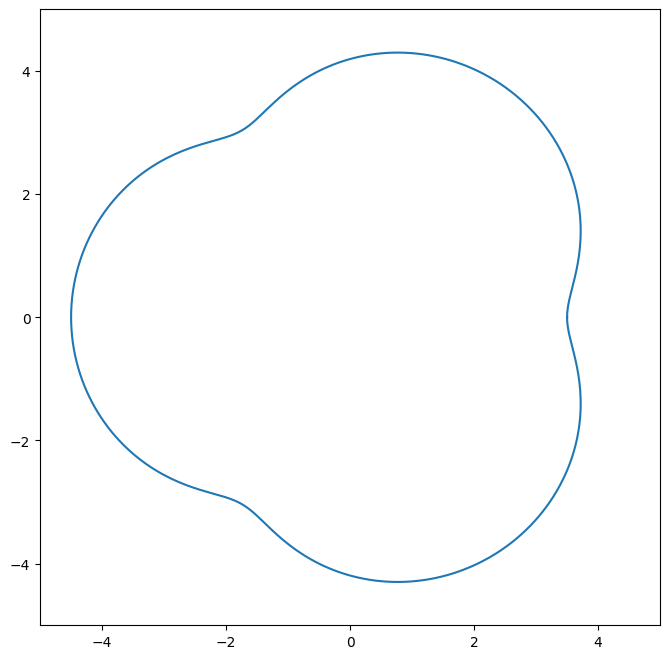

In [73]:
spirograph(R=3, r=-1, a=-1/2, boundary=5, step=360)
#uncomment the next line for an alternative to play with
#spirograph(R=37, r=-8, a=5, boundary=60, step=360)

In such a way, the [cardioid](https://en.wikipedia.org/wiki/Cardioid) is also in this family of curves:

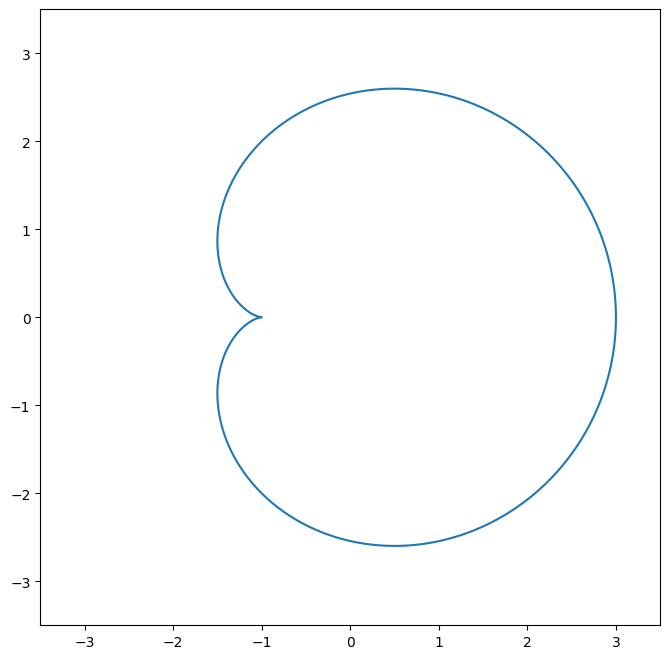

In [75]:
spirograph(R=1, r=-1,a=1, boundary=3.5, step=360)

In a programmable environment, it would be easy to create loops:

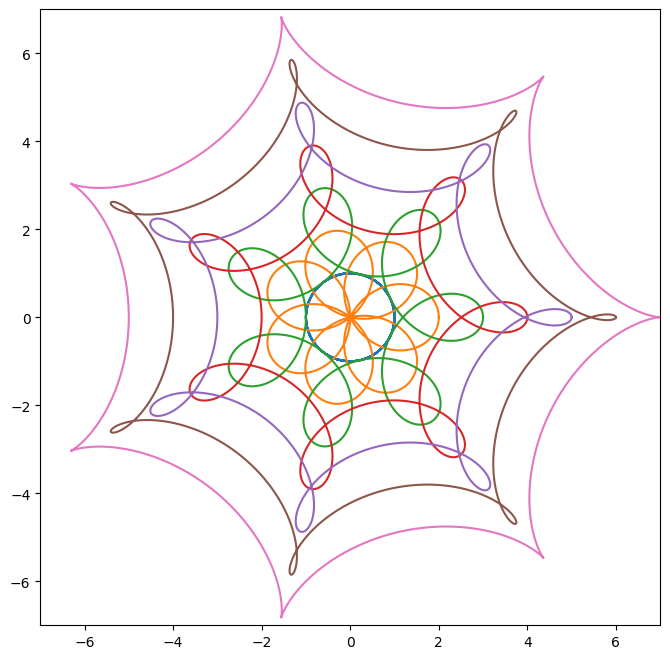

In [94]:
#loop over a for given R and r
def aRanging(R, r, boundary, step=360):
  R = int(R)
  r = int(r)
  for a in range(0,r+1):
    #compute number of cycles to complete the spirograph
    n = abs(int(r/gcdEuclid(R,r)))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
aRanging(7, 6, boundary=7, step=360)

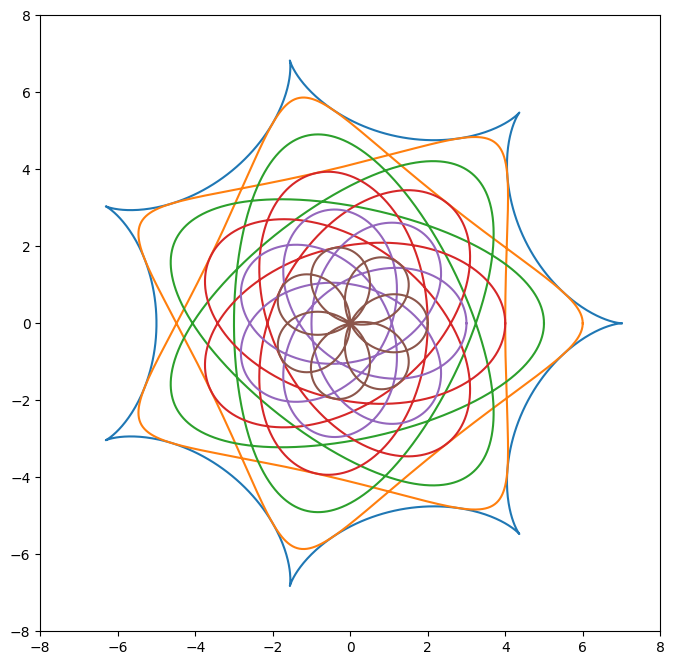

In [100]:
#loop over r for given R and a
def rRanging(R, a, boundary, step=360):
  R = int(R)
  for r in range(1,R):
    r = int(r)
    #compute number of cycles to complete the spirograph
    n = abs(int(r/gcdEuclid(R,r)))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()

rRanging(7, 1, boundary=8, step=1000)

Loop over some hypocycloids, did you find something special?

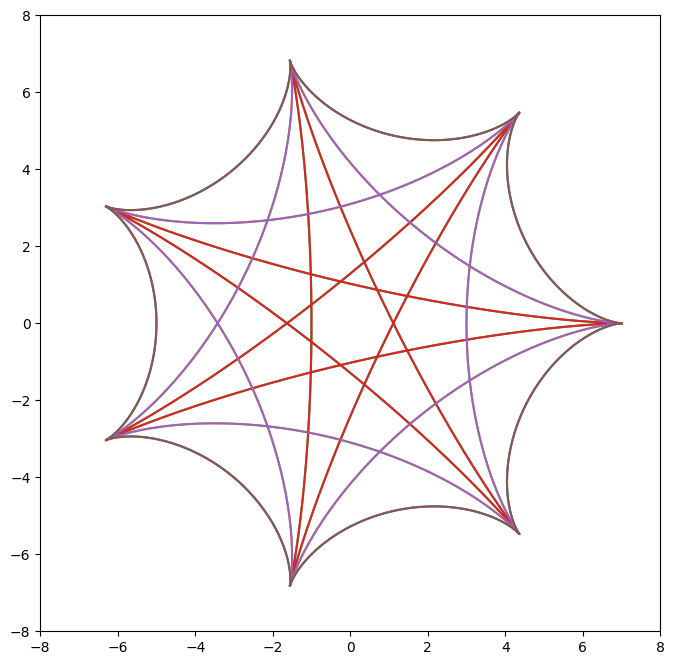

In [110]:
#let a and r loop at the same time
def loop1(R, step=360):
  R = int(R)
  boundary = R+1
  for r in range(1,R):
    a = r
    #compute number of cycles to complete the spirograph
    n = int(r/gcdEuclid(R,r))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
loop1(R=7, step=360)

Make sure the previous cells had been run before you may play with the following plots:

How about this loop?

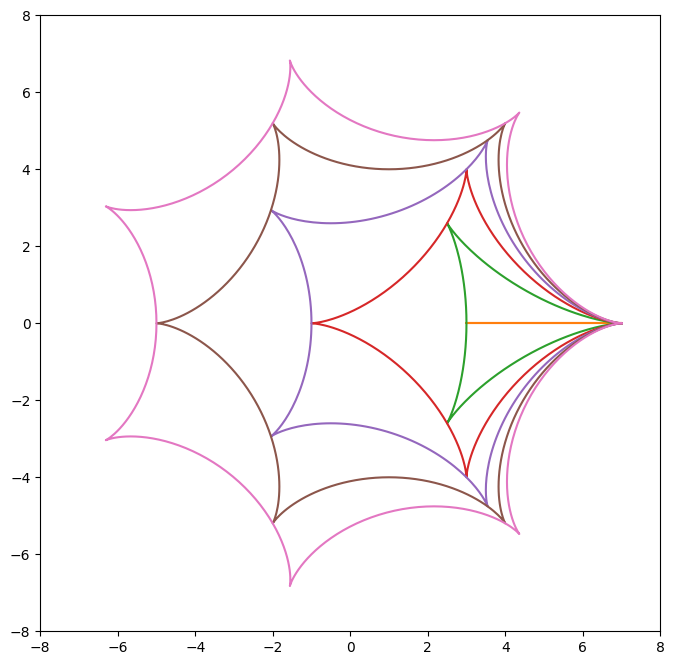

In [118]:
def loop2(RR, step=360):
  boundary = RR+1
  r = 1
  a = 1
  for R in range(1,RR+1):
    #compute number of cycles to complete the spirograph
    n = int(r/gcdEuclid(R,r))
    s = np.array(range(n*step+1))
    plt.rcParams["figure.figsize"] = (8,8)
    plt.xlim(-boundary,boundary)
    plt.ylim(-boundary,boundary)
    thetas = 2*np.pi*s/step
    xs = (R-r)*np.cos(thetas)+a*np.cos(thetas*(R-r)/r)-R+RR
    ys = (R-r)*np.sin(thetas)-a*np.sin(thetas*(R-r)/r)
    plt.plot(xs, ys)
  plt.show()
loop2(7, step=360)